In [1]:
import helper.get_image
import numpy as np

# FOLDER_PATH = 'F://term7//CV//reference'
FOLDER_PATH = "C:/Users/Dominic/Desktop/Concrete Crack Images for Classification/"

# random
train_size = 200
test_size = 100
val_size = 40

img_range = np.arange(1, 800)
X_train_pos_idx, X_test_pos_idx, X_val_pos_idx = helper.get_random_indices(img_range, train_size, test_size, val_size)
X_train_neg_idx, X_test_neg_idx, X_val_neg_idx = helper.get_random_indices(img_range, train_size, test_size, val_size)

X_train, Y_train = helper.get_concrete_data(X_train_pos_idx, X_train_neg_idx, path = FOLDER_PATH)
#X_test , Y_test  = helper.get_concrete_data(X_test_pos_idx, X_test_neg_idx, path = FOLDER_PATH)
#X_val  , Y_val   = helper.get_concrete_data(X_val_pos_idx, X_val_neg_idx, path = FOLDER_PATH)

print( X_train.shape, Y_train.shape )
#print( X_test.shape , Y_test.shape  )
#print( X_val.shape  , Y_val.shape   )

(400, 227, 227) (400,)


In [2]:
# from filters.filter import GrayscaleNormalizer
# normalizer = GrayscaleNormalizer()
# X_train[:] = normalizer(X_train[:][0]) 
# X_train_flat = X_train.reshape(X_train.shape[0],-1)

In [3]:
from filters.bilateral import bilateral_canny
grayscale_class = bilateral_canny()

In [4]:
for idx in range(X_train.shape[0]):
    X_train[idx] = grayscale_class.bilateral_canny_img(X_train[idx]) 

In [5]:

X_train_flat = X_train.reshape(X_train.shape[0],-1)

In [6]:
# train a logistic model
from sklearn import linear_model
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train_flat, Y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## Sliding window

In [7]:
import cv2
import numpy as np
import sys
import matplotlib
from matplotlib import pyplot as plt
import pylab as pl

In [8]:
# automatically reload imported modules
%load_ext autoreload
%autoreload 2

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#FOLDER_PATH = "C:/Users/Dominic/Desktop/Concrete Crack Images for Classification/"



(1080, 1920)
(106, 112)
(9, 16, 227, 227)
0.15623903274536133
Plotting...


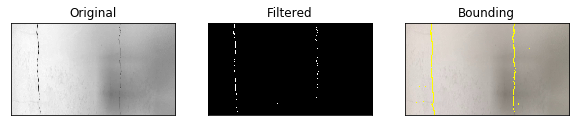

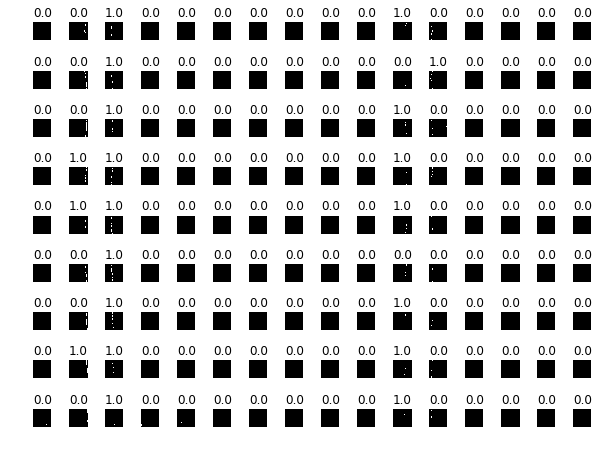

In [94]:
from helper import rolling_window, shade_area, get_stride
import time

PATH = "C:/Users/Dominic/Desktop/VideoFrame/"

# img = "F:\\term7\\CV\\ProjectTrail\\VideoFrame2\\00165.jpg"
file_name = PATH + "00165.jpg"

img = cv2.imread(file_name, cv2.IMREAD_COLOR)
img_col = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img_col, cv2.COLOR_BGR2GRAY)
print(img.shape)

window_size = (227, 227)
stride = get_stride(img.shape, window_size, coverage = 0.5)
print(stride)

filtered = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 5)
filtered = filtered.astype(np.float32)
filtered -= 255
filtered *= -1

imgs = rolling_window(filtered, window_size, stride)
nx, ny = imgs.shape[0], imgs.shape[1]
print(imgs.shape)

plt.figure(figsize=(20, 20 * nx / ny))

result = logistic.predict(imgs.reshape(nx * ny, -1)).reshape(nx, ny)
t = time.time()
boxed = shade_area(img_col, imgs, result, window_size, stride)
print(time.time() - t)
print("Plotting...")

plt.figure(figsize=(10,5))

plt.subplot(131),plt.imshow(img, cmap='gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])

plt.subplot(132),plt.imshow(filtered, cmap='gray')
plt.title('Filtered'),plt.xticks([]),plt.yticks([])

plt.subplot(133),plt.imshow(boxed)
plt.title('Bounding'),plt.xticks([]),plt.yticks([])

plt.show()

for i in range(nx):
    for j in range(ny):
        plt.subplot(nx, ny, i * ny + j + 1)
        plt.imshow(imgs[i, j],cmap='gray')
        plt.axis('off')
        plt.title(result[i, j])
        
        
plt.subplots_adjust(wspace=1, hspace=0)
plt.show()